In [1]:
# Import our libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns
import re

In [2]:
df = pd.read_csv('datasets/Cleaned_Salary_Prediction.csv')
df.shape

(742, 33)

In [3]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
..          ...                                                ...   
737         737           Sr Scientist, Immuno-Oncology - Oncology   
738         738                               Senior Data Engineer   
739         739  Project Scientist - Auton Lab, Robotics Institute   
740         740                               Data Science Manager   
741         741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Gl

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [6]:
# Displaying a STATISTICAL summary of our data in 5dp 
# (only for columns with numerical values)
pd.options.display.float_format = '{:.5f}'.format
df.describe()
# .describe() is a function in pandas that shows the statistical summary of our dataset

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000
mean,370.50000,3.61887,1837.15499,0.03235,0.02291,74.71968,128.14960,100.62601,0.55795,46.59164,0.52830,0.00270,0.22507,0.23720,0.52291,3869.54582,1.05391
std,214.34124,0.80121,497.18376,0.17703,0.14972,30.98059,45.22032,38.85595,0.49697,53.77882,0.49954,0.05188,0.41791,0.42565,0.49981,1521.49587,1.38424
min,0.00000,-1.00000,-1.00000,0.00000,0.00000,15.00000,16.00000,13.50000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,407.00000,0.00000
25%,185.25000,3.30000,1939.00000,0.00000,0.00000,52.00000,96.00000,73.50000,0.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2801.00000,0.00000
50%,370.50000,3.70000,1988.00000,0.00000,0.00000,69.50000,124.00000,97.50000,1.00000,24.00000,1.00000,0.00000,0.00000,0.00000,1.00000,3731.00000,0.00000
75%,555.75000,4.00000,2007.00000,0.00000,0.00000,91.00000,155.00000,122.50000,1.00000,59.00000,1.00000,0.00000,0.00000,0.00000,1.00000,4740.00000,3.00000
max,741.00000,5.00000,2019.00000,1.00000,1.00000,202.00000,306.00000,254.00000,1.00000,276.00000,1.00000,1.00000,1.00000,1.00000,1.00000,10051.00000,4.00000


In [7]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [8]:
print(df.head())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu... 3.80000   
1  What You Will Do:\n\nI. General Summary\n\nThe... 3.40000   
2  KnowBe4, Inc. is a high growth information sec... 4.80000   
3  *Organization and Job ID**\nJob ID: 310709\n\n... 3.80000   
4  Data Scientist\nAffinity Solutions / Marketing... 2.90000   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

In [9]:
print(df['Salary Estimate'].dtype)
print(df['Salary Estimate'].head())
print(df['Salary Estimate'].unique())

object
0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object
['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)' '$71K-$119K (Glassdoor est.)'
 '$54K-$93K (Glassdoor est.)' '$86K-$142K (Glassdoor est.)'
 '$38K-$84K (Glassdoor est.)' '$120K-$160K (Glassdoor est.)'
 '$126K-$201K (Glassdoor est.)' '$64K-$106K (Glassdoor est.)'
 '$106K-$172K (Glassdoor est.)' '$46K-$85K (Glassdoor est.)'
 '$83K-$144K (Glassdoor est.)' '$102K-$190K (Glassdoor est.)'
 '$67K-$137K (Glassdoor est.)' '$118K-$189K (Glassdoor est.)'
 '$110K-$175K (Glassdoor est.)' '$64K-$111K (Glassdoor est.)'
 '$81K-$130K (Glassdoor est.)' '$73K-$119K (Glassdoor est.)'
 '$86K-$139K (Glassdoor est.)' '$63K-$105K (Glassdoor est.)'
 '$109K-$177K (Glassdoor est.)' '$63K-$110K (Glassdoor est.

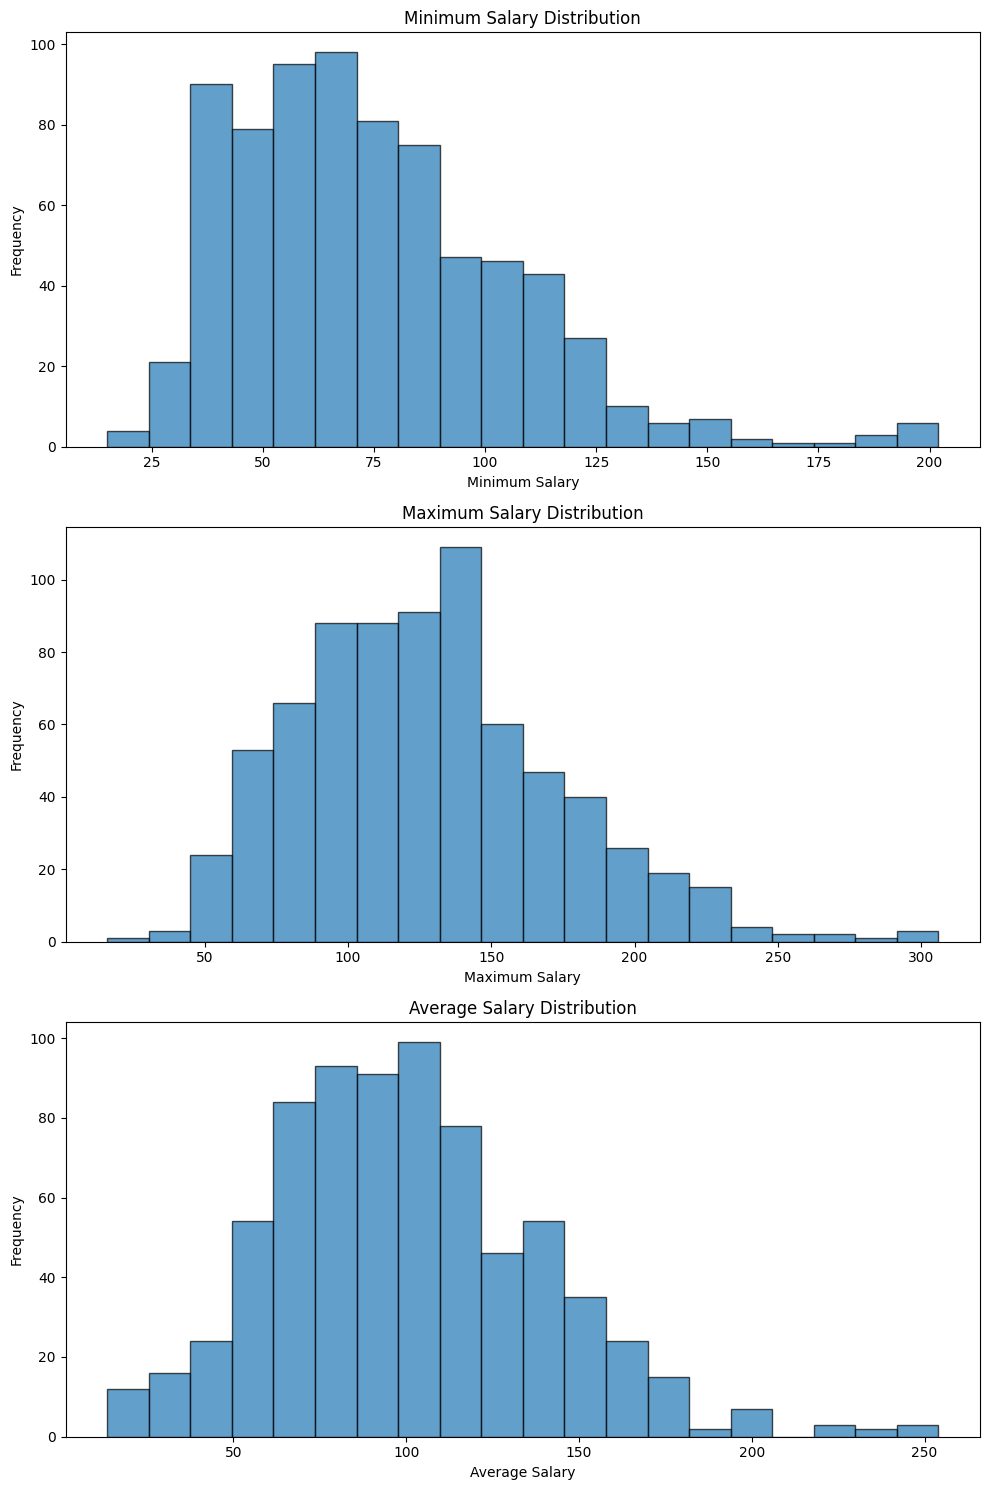

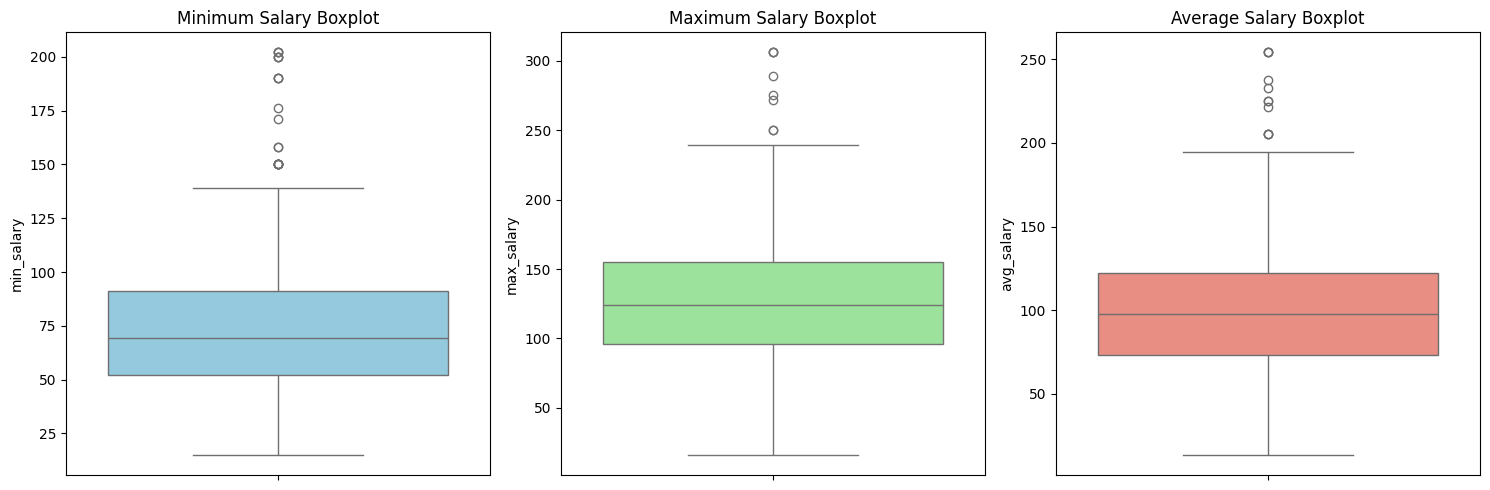

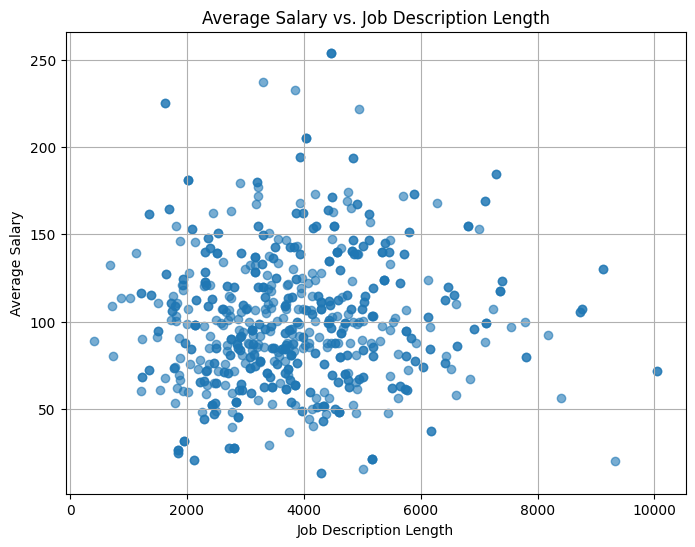

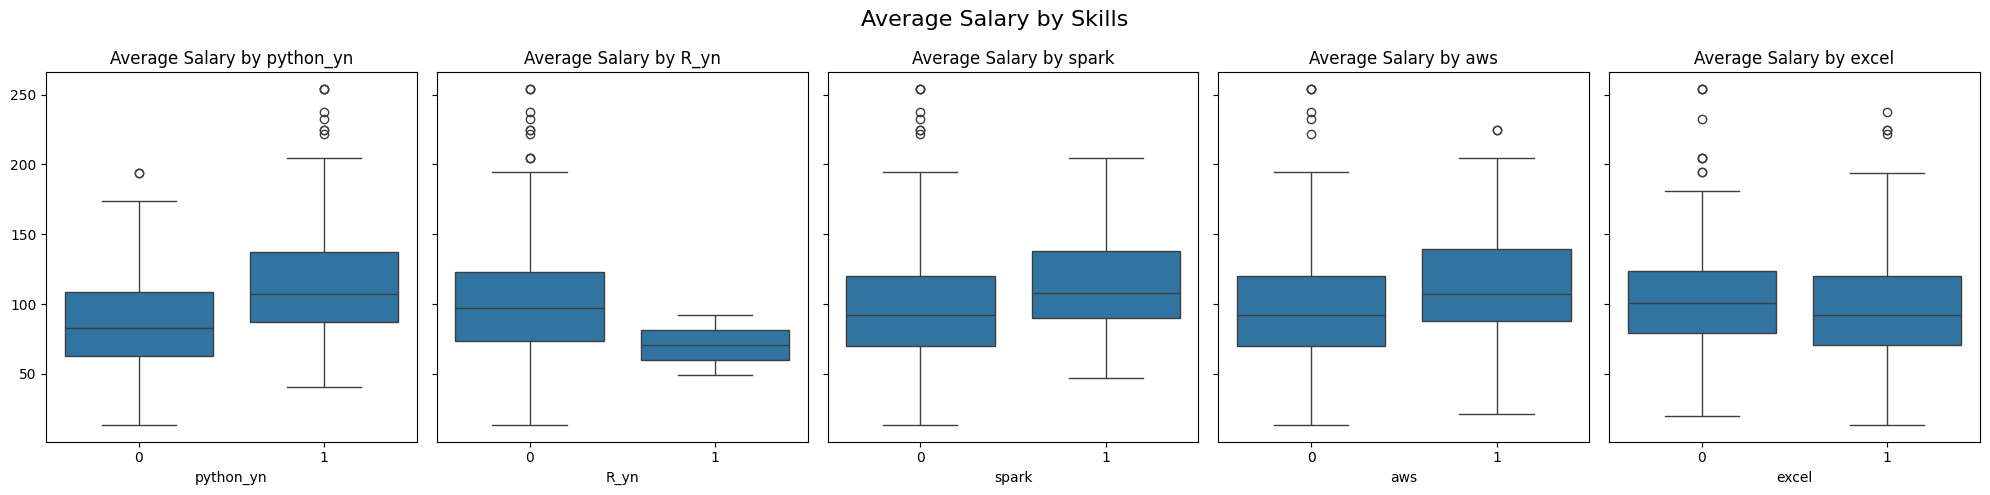

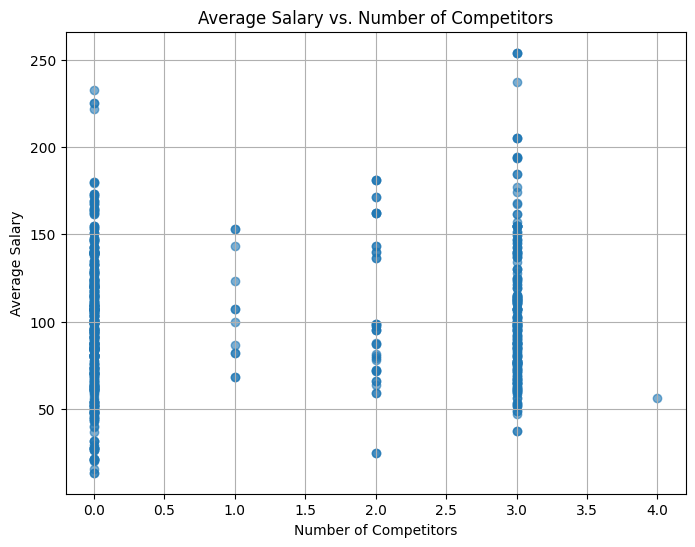

In [10]:
# Visualize salary distributions
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Min Salary Distribution
ax[0].hist(df['min_salary'], bins=20, edgecolor='k', alpha=0.7)
ax[0].set_title('Minimum Salary Distribution')
ax[0].set_xlabel('Minimum Salary')
ax[0].set_ylabel('Frequency')

# Max Salary Distribution
ax[1].hist(df['max_salary'], bins=20, edgecolor='k', alpha=0.7)
ax[1].set_title('Maximum Salary Distribution')
ax[1].set_xlabel('Maximum Salary')
ax[1].set_ylabel('Frequency')

# Average Salary Distribution
ax[2].hist(df['avg_salary'], bins=20, edgecolor='k', alpha=0.7)
ax[2].set_title('Average Salary Distribution')
ax[2].set_xlabel('Average Salary')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for Salaries
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Corrected Boxplots
sns.boxplot(y=df['min_salary'], ax=ax[0], color='skyblue')
ax[0].set_title('Minimum Salary Boxplot')

sns.boxplot(y=df['max_salary'], ax=ax[1], color='lightgreen')
ax[1].set_title('Maximum Salary Boxplot')

sns.boxplot(y=df['avg_salary'], ax=ax[2], color='salmon')
ax[2].set_title('Average Salary Boxplot')

plt.tight_layout()
plt.show()

# Scatter plot for Average Salary vs. Job Description Length
plt.figure(figsize=(8, 6))
plt.scatter(df['desc_len'], df['avg_salary'], alpha=0.6)
plt.title('Average Salary vs. Job Description Length')
plt.xlabel('Job Description Length')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

# Boxplot for Average Salary by Skills
skills = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
fig, axes = plt.subplots(1, len(skills), figsize=(20, 5), sharey=True)

for i, skill in enumerate(skills):
    sns.boxplot(x=df[skill], y=df['avg_salary'], ax=axes[i])
    axes[i].set_title(f'Average Salary by {skill}')
    axes[i].set_xlabel(skill)
    axes[i].set_ylabel('')

fig.suptitle('Average Salary by Skills', fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plot for Average Salary vs. Number of Competitors
plt.figure(figsize=(8, 6))
plt.scatter(df['num_comp'], df['avg_salary'], alpha=0.6)
plt.title('Average Salary vs. Number of Competitors')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()


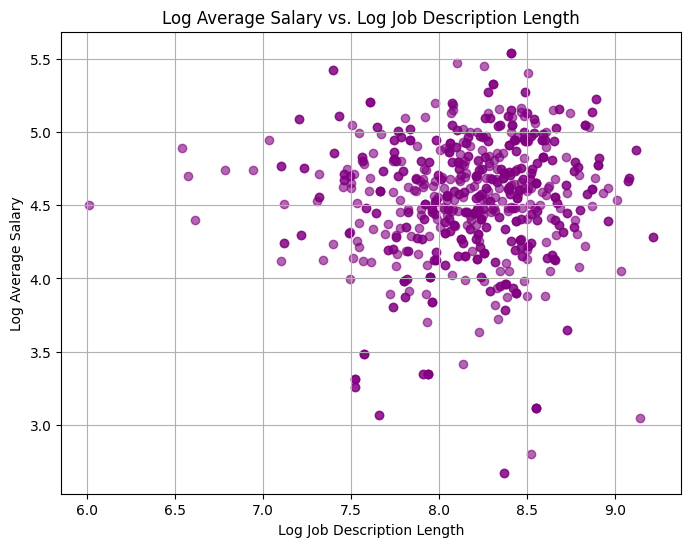

In [11]:
df['log_desc_len'] = np.log(df['desc_len']+ 1)
df['log_avg_salary'] = np.log(df['avg_salary'] + 1)

# Scatter plot for Log Average Salary vs. Log Job Description Length
plt.figure(figsize=(8, 6))
plt.scatter(df['log_desc_len'], df['log_avg_salary'], alpha=0.6, color='purple')
plt.title('Log Average Salary vs. Log Job Description Length')
plt.xlabel('Log Job Description Length')
plt.ylabel('Log Average Salary')
plt.grid(True)
plt.show()

In [12]:
job_titles = df['Job Title'].unique()
# Display the unique job titles
print("Unique Job Titles:")
for idx, title in enumerate(job_titles, start=1):
    print(f"{idx}. {title}")

Unique Job Titles:
1. Data Scientist
2. Healthcare Data Scientist
3. Research Scientist
4. Staff Data Scientist - Technology
5. Data Analyst
6. Data Engineer I
7. Scientist I/II, Biology
8. Customer Data Scientist
9. Data Scientist - Health Data Analytics
10. Senior Data Scientist / Machine Learning
11. Data Scientist - Quantitative
12. Digital Health Data Scientist
13. Associate Data Analyst
14. Clinical Data Scientist
15. Data Scientist / Machine Learning Expert
16. Web Data Analyst
17. Senior Data Scientist
18. Data Engineer
19. Data Scientist - Algorithms & Inference
20. Scientist
21. Lead Data Scientist
22. Spectral Scientist/Engineer
23. College Hire - Data Scientist - Open to December 2019 Graduates
24. Data Scientist, Office of Data Science
25. Data Science Analyst
26. Senior Risk Data Scientist
27. Data Scientist in Artificial Intelligence Early Career
28. Data Scientist - Research
29. R&D Data Analysis Scientist
30. Analytics Consultant
31. Director, Data Science
32. Data Sci

Grouped Job Categories:
Job Category
Data Scientist               279
Other                        200
Engineer                     142
Data Analyst                  99
Machine Learning Engineer     22
Name: count, dtype: int64


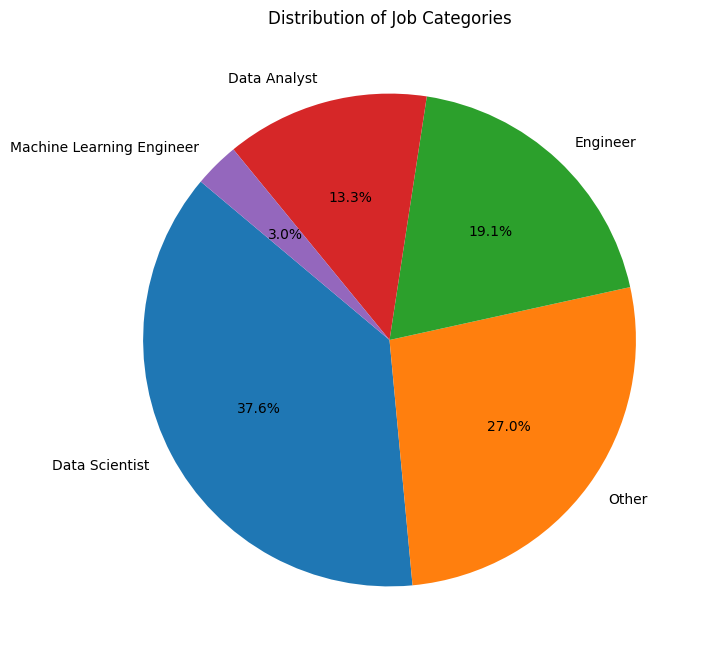

In [13]:

job_title_column = 'Job Title'

# Define a function to group similar job titles
def categorize_job_title(title):
    title = str(title).lower()  # Convert to lowercase to standardize
    if re.search(r'data\s*scientist', title):
        return 'Data Scientist'
    elif re.search(r'data\s*analyst', title):
        return 'Data Analyst'
    elif re.search(r'machine\s*learning|ml\s*engineer', title):
        return 'Machine Learning Engineer'
    elif re.search(r'engineer', title):
        return 'Engineer'
    else:
        return 'Other'

# Apply the function to create a new column with grouped categories
df['Job Category'] = df[job_title_column].apply(categorize_job_title)

# Group and count the job categories
job_category_counts = df['Job Category'].value_counts()

# Display the results
print("Grouped Job Categories:")
print(job_category_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(job_category_counts, labels=job_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Categories')  # Title for the pie chart
plt.show()

Unique Industries:
1. Aerospace & Defense
2. Health Care Services & Hospitals
3. Security Services
4. Energy
5. Advertising & Marketing
6. Real Estate
7. Banks & Credit Unions
8. Consulting
9. Internet
10. Other Retail Stores
11. Research & Development
12. Department, Clothing, & Shoe Stores
13. Biotech & Pharmaceuticals
14. Motion Picture Production & Distribution
15. Enterprise Software & Network Solutions
16. Insurance Carriers
17. Insurance Agencies & Brokerages
18. Logistics & Supply Chain
19. Telecommunications Services
20. IT Services
21. Computer Hardware & Software
22. -1
23. Consumer Products Manufacturing
24. Industrial Manufacturing
25. Metals Brokers
26. Financial Transaction Processing
27. Sporting Goods Stores
28. Staffing & Outsourcing
29. Wholesale
30. Mining
31. Financial Analytics & Research
32. Federal Agencies
33. Education Training Services
34. Transportation Equipment Manufacturing
35. Farm Support Services
36. TV Broadcast & Cable Networks
37. Architectural & En

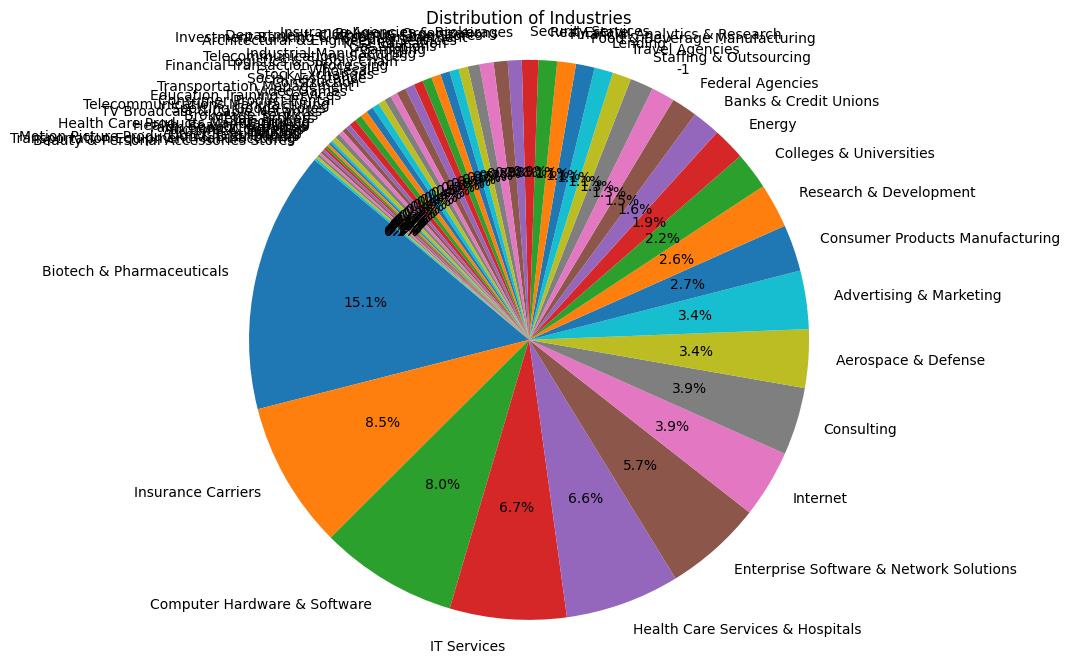

In [14]:

# Find unique industries in the 'Industry' column
unique_industries = df['Industry'].dropna().unique()  # Drop missing values and get unique values

# Display unique industries
print("Unique Industries:")
for idx, industry in enumerate(unique_industries, start=1):
    print(f"{idx}. {industry}")

# Optional: Count the occurrences of each industry
industry_counts = df['Industry'].value_counts()

# Display industry counts
print("\nIndustry Counts:")
print(industry_counts)


# Plot the industry distribution as a pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industries')  # Add a title to the chart
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

